# *Step 1: Exploratory Data Analysis (EDA)* #

## Section 1.1 : Understand the Dataset ##

In [14]:
# Import essential libraries
import pandas as pd

# Load the Airbnb dataset
df = pd.read_csv("airbnb.csv")  



In [15]:

# Rename incorrect column
df.rename(columns={'toiles': 'toilets'}, inplace=True)

# Drop unnecessary ID and image link columns for now
df.drop(columns=['Unnamed: 0', 'id', 'host_id', 'img_links'], inplace=True)

# Display structure and basic information about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12805 entries, 0 to 12804
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          12805 non-null  object
 1   rating        12805 non-null  object
 2   reviews       12805 non-null  object
 3   host_name     12797 non-null  object
 4   address       12805 non-null  object
 5   features      12805 non-null  object
 6   amenities     12805 non-null  object
 7   safety_rules  12805 non-null  object
 8   hourse_rules  12805 non-null  object
 9   price         12805 non-null  int64 
 10  country       12805 non-null  object
 11  bathrooms     12805 non-null  int64 
 12  beds          12805 non-null  int64 
 13  guests        12805 non-null  int64 
 14  toilets       12805 non-null  int64 
 15  bedrooms      12805 non-null  int64 
 16  studios       12805 non-null  int64 
 17  checkin       12005 non-null  object
 18  checkout      10355 non-null  ob

In [16]:
# Display the first 5 rows to understand what the data looks like
print("\n First 5 Records:\n")
print(df.head())




 First 5 Records:

                                                name rating reviews  \
0                                     Perla bungalov   4.71      64   
1  Authentic Beach Architect Sheltered Villa with...    New       0   
2                                  cottages sataplia   4.85      68   
3                        Sapanca Breathable Bungalow    5.0      13   
4                                      Bungalov Ev 2    New       0   

     host_name                   address  \
0    Mehmetcan  Kartepe, Kocaeli, Turkey   
1        Fatih      Kaş, Antalya, Turkey   
2       Giorgi          Imereti, Georgia   
3        Melih  Sapanca, Sakarya, Turkey   
4  Arp Sapanca  Sapanca, Sakarya, Turkey   

                                 features  \
0    2 guests,2 bedrooms,1 bed,1 bathroom   
1  4 guests,2 bedrooms,2 beds,2 bathrooms   
2    4 guests,1 bedroom,3 beds,1 bathroom   
3    4 guests,1 bedroom,2 beds,1 bathroom   
4     2 guests,1 bedroom,1 bed,1 bathroom   

                 

In [17]:
# Check for missing values in each column
print("\n Missing Values:\n")
print(df.isnull().sum())




 Missing Values:

name               0
rating             0
reviews            0
host_name          8
address            0
features           0
amenities          0
safety_rules       0
hourse_rules       0
price              0
country            0
bathrooms          0
beds               0
guests             0
toilets            0
bedrooms           0
studios            0
checkin          800
checkout        2450
dtype: int64


In [18]:
# View the data types of each column
print("\n Data Types:\n")
print(df.dtypes)




 Data Types:

name            object
rating          object
reviews         object
host_name       object
address         object
features        object
amenities       object
safety_rules    object
hourse_rules    object
price            int64
country         object
bathrooms        int64
beds             int64
guests           int64
toilets          int64
bedrooms         int64
studios          int64
checkin         object
checkout        object
dtype: object


In [19]:
# Show summary statistics of numerical columns
print("\n Summary Statistics:\n")
print(df.describe())


 Summary Statistics:

              price     bathrooms          beds        guests       toilets  \
count  1.280500e+04  12805.000000  12805.000000  12805.000000  12805.000000   
mean   1.769780e+04      1.874424      3.316751      5.213745      0.019211   
std    4.569364e+04      2.091399      4.037791      3.808830      0.137272   
min    3.930000e+02      0.000000      0.000000      1.000000      0.000000   
25%    3.994000e+03      1.000000      1.000000      2.000000      0.000000   
50%    8.175000e+03      1.000000      2.000000      4.000000      0.000000   
75%    1.606200e+04      2.000000      4.000000      6.000000      0.000000   
max    1.907963e+06     50.000000     98.000000     16.000000      1.000000   

           bedrooms       studios  
count  12805.000000  12805.000000  
mean       2.136041      0.023585  
std        2.359005      0.151757  
min        0.000000      0.000000  
25%        1.000000      0.000000  
50%        1.000000      0.000000  
75%        3.

In [25]:
# Summary of text-based features to be used in ANN
text_features = ['features', 'amenities', 'safety_rules', 'hourse_rules',]
print("\nUnique Value Count in Text Features:")
print(df[text_features].nunique())

print("\nAverage Length of Each Text Feature:")
print(df[text_features].applymap(lambda x: len(str(x))).mean())


Unique Value Count in Text Features:
features         2548
amenities       11630
safety_rules      257
hourse_rules     5800
dtype: int64

Average Length of Each Text Feature:
features         38.442093
amenities       190.530418
safety_rules    141.479656
hourse_rules    101.003046
dtype: float64


## Section 1.2: Distribution Analysis of Numerical Columns ##

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns



In [21]:
# Convert rating and reviews to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['reviews'] = pd.to_numeric(df['reviews'], errors='coerce')

# Numerical columns for distribution analysis
numerical_cols = ['price', 'rating', 'reviews', 'bathrooms', 'bedrooms',
                  'guests', 'beds', 'toilets', 'studios']




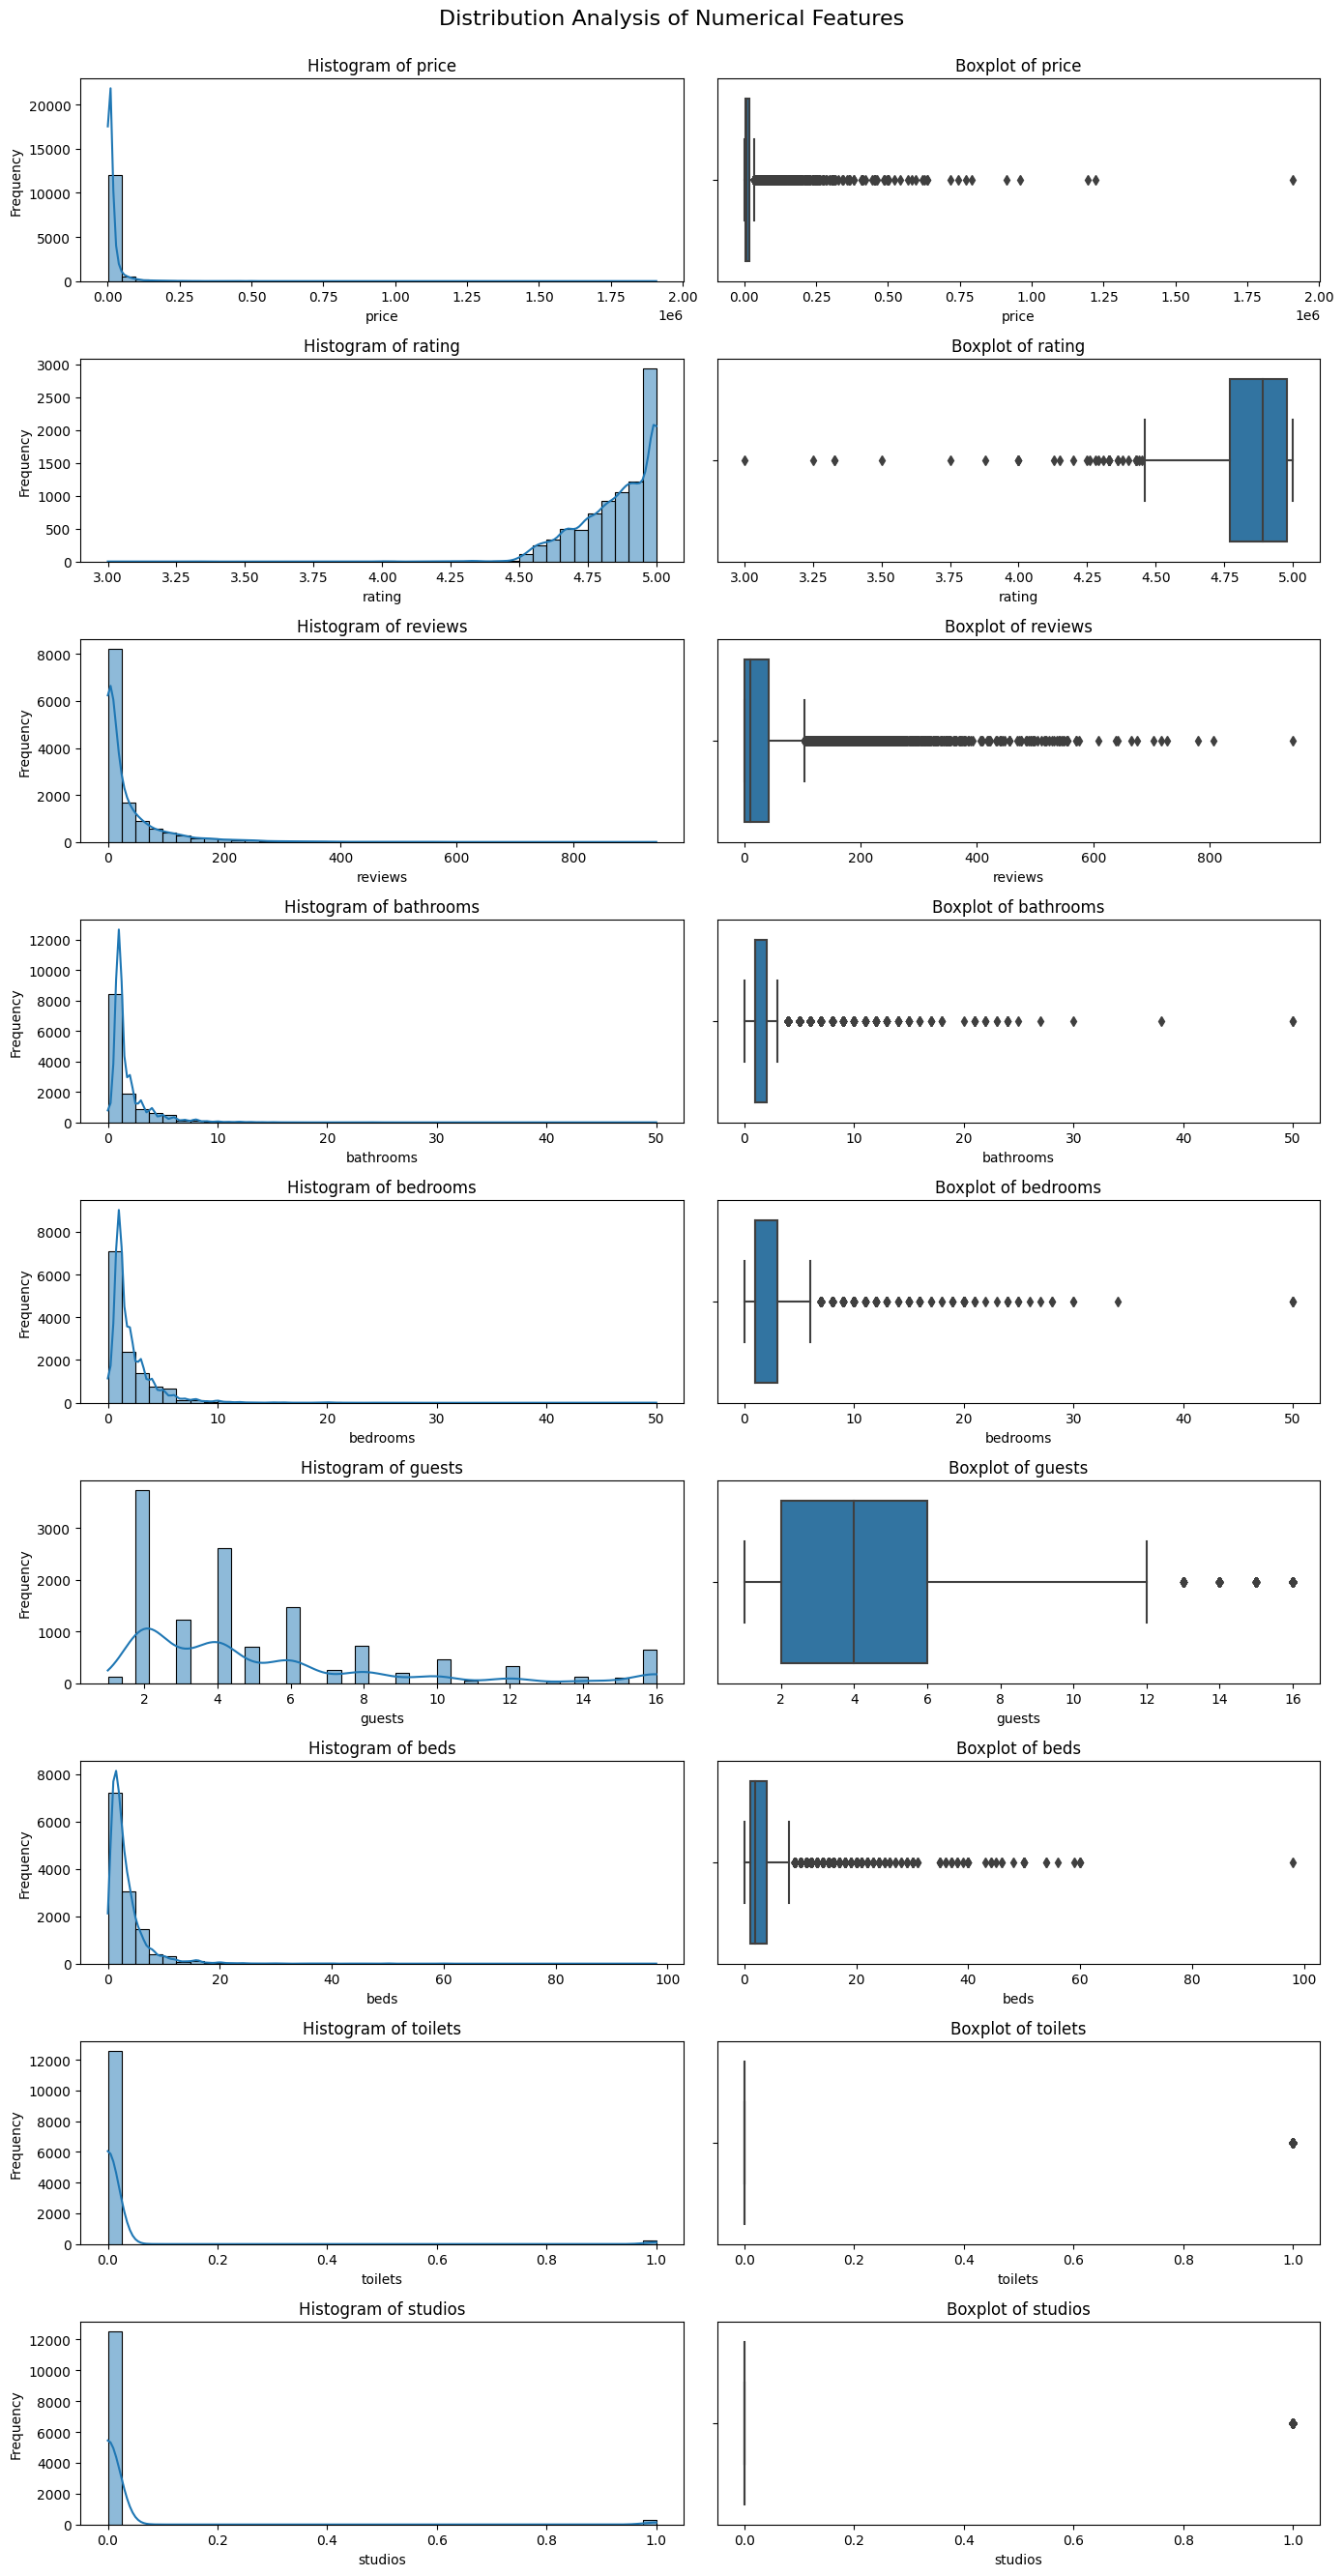

In [22]:
# Set up the figure for histogram and boxplot side by side
fig, axs = plt.subplots(len(numerical_cols), 2, figsize=(14, 28))
fig.suptitle("Distribution Analysis of Numerical Features", fontsize=16)

# Loop through each numerical column and plot both histogram and boxplot
for i, col in enumerate(numerical_cols):
    # Histogram with KDE (Kernel Density Estimation)
    sns.histplot(df[col].dropna(), kde=True, ax=axs[i, 0], bins=40)
    axs[i, 0].set_title(f'Histogram of {col}', fontsize=12)
    axs[i, 0].set_xlabel(col)
    axs[i, 0].set_ylabel("Frequency")
    
    # Boxplot to identify outliers
    sns.boxplot(x=df[col], ax=axs[i, 1])
    axs[i, 1].set_title(f'Boxplot of {col}', fontsize=12)
    axs[i, 1].set_xlabel(col)

# Improve spacing between plots
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()


## Section 1.3 – Correlation Analysis   ##

e:\Wasif_Projects\JoinVentureAI_Task\AirBnB_Prediction_Listings\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


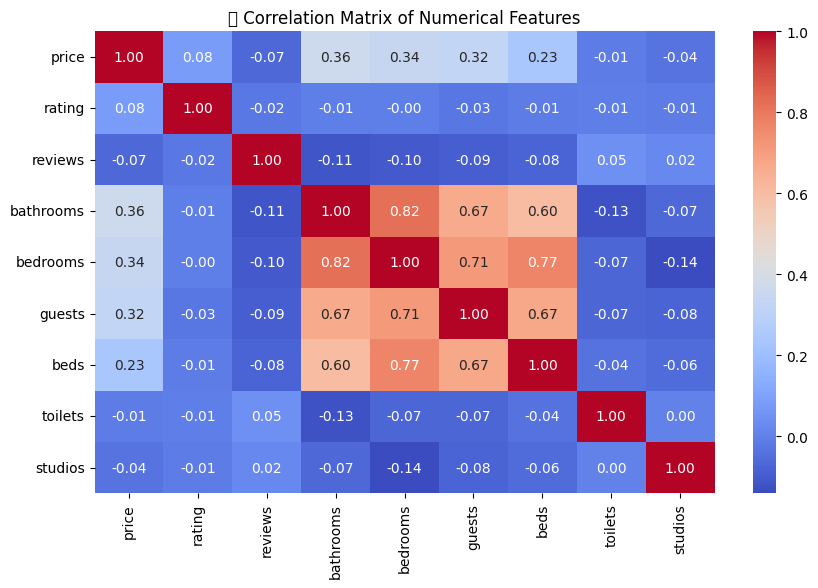

In [23]:
# Correlation matrix of cleaned numeric columns
corr_cols = ['price', 'rating', 'reviews', 'bathrooms', 'bedrooms',
             'guests', 'beds', 'toilets', 'studios']
corr_matrix = df[corr_cols].corr()


# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔗 Correlation Matrix of Numerical Features")
plt.show()


## Section 1.4 – Analyze Categorical & Textual Features   ##

e:\Wasif_Projects\JoinVentureAI_Task\AirBnB_Prediction_Listings\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


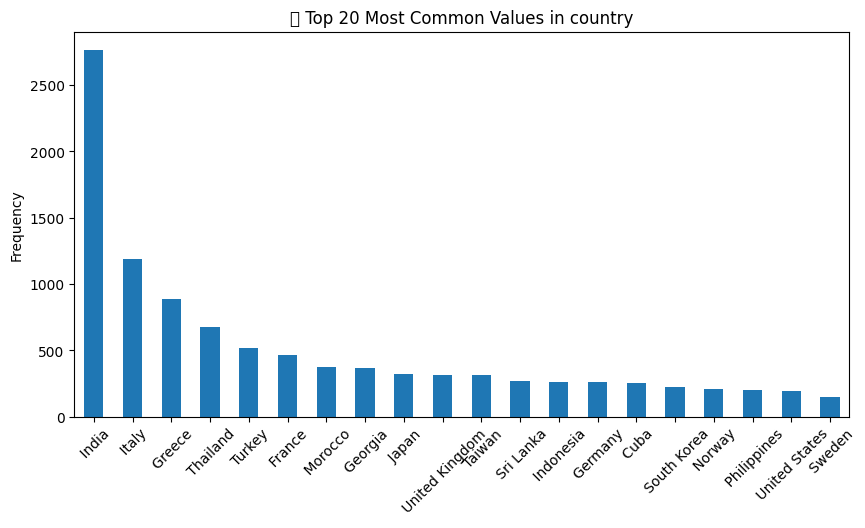

e:\Wasif_Projects\JoinVentureAI_Task\AirBnB_Prediction_Listings\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


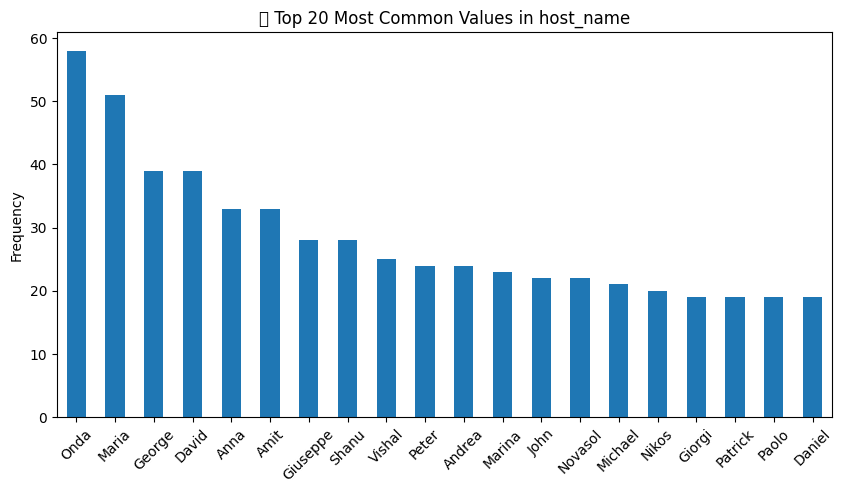

e:\Wasif_Projects\JoinVentureAI_Task\AirBnB_Prediction_Listings\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


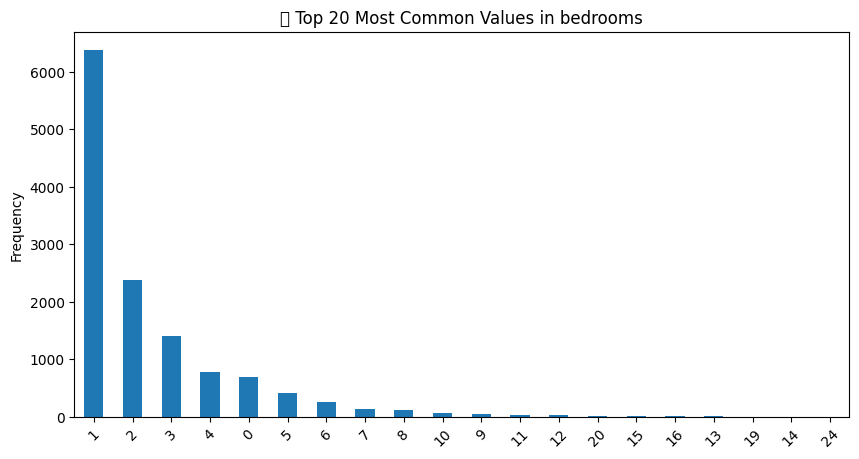

e:\Wasif_Projects\JoinVentureAI_Task\AirBnB_Prediction_Listings\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


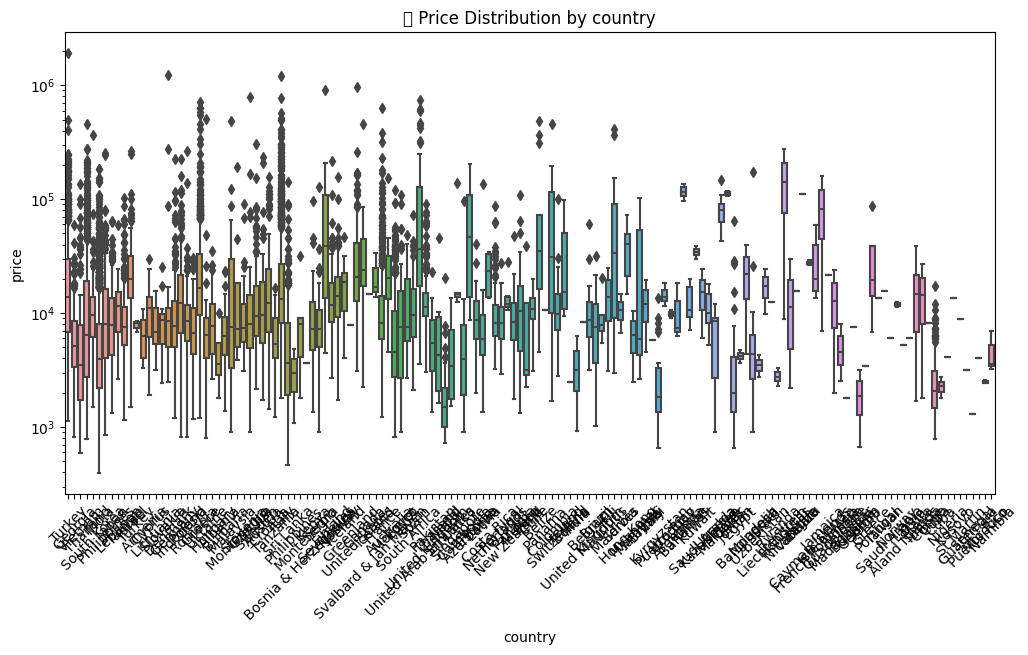

e:\Wasif_Projects\JoinVentureAI_Task\AirBnB_Prediction_Listings\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


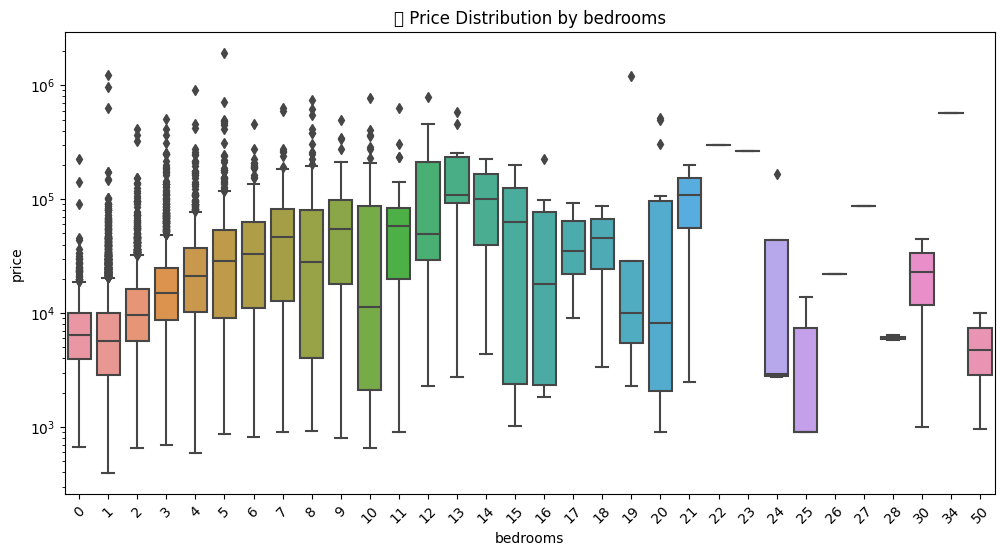

🔍 Sample of 'amenities' and 'features':

                                          features  \
10192      10 guests,4 bedrooms,5 beds,3 bathrooms   
12413  2 guests,1 bedroom,1 bed,1 private bathroom   
1358           2 guests,1 bedroom,1 bed,1 bathroom   
6595          2 guests,1 bedroom,1 bed,2 bathrooms   
7458       5 guests,1 bedroom,3 beds,1.5 bathrooms   

                                               amenities  
10192  Golf course view,Waterfront,Kitchen,Wifi,Free ...  
12413  Wifi,Free parking on premises,Pets allowed,Smo...  
1358   Kitchen,Free parking on premises,Patio or balc...  
6595   Lake access,Kitchen,Wifi,Dedicated workspace,F...  
7458   City skyline view,Mountain view,Public or shar...  


In [24]:
# Categorical fields to analyze
cat_cols = ['country', 'host_name', 'bedrooms']

# Plot distribution of each categorical feature
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    df[col].value_counts().head(20).plot(kind='bar')
    plt.title(f'🧾 Top 20 Most Common Values in {col}')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Relationship with price: boxplots
for col in ['country', 'bedrooms']:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f'💰 Price Distribution by {col}')
    plt.xticks(rotation=45)
    plt.yscale('log')  # to handle skewed price
    plt.show()

# Example previews of text features
print("🔍 Sample of 'amenities' and 'features':\n")
print(df[['features', 'amenities']].sample(5, random_state=42))


## Step 2.1: Handle Missing Values ##

In [27]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("airbnb.csv")

# Fix misnamed column
df.rename(columns={'toiles': 'toilets'}, inplace=True)

# Drop ID and irrelevant columns
df.drop(columns=['Unnamed: 0', 'id', 'host_id', 'img_links'], inplace=True)

# Convert text-based numerics
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['reviews'] = pd.to_numeric(df['reviews'], errors='coerce')

# Impute missing numerical values
num_imputer = SimpleImputer(strategy='median')
df[['rating', 'reviews']] = num_imputer.fit_transform(df[['rating', 'reviews']])

# Impute missing categorical values
cat_imputer = SimpleImputer(strategy='most_frequent')
df[['host_name', 'checkin', 'checkout']] = cat_imputer.fit_transform(df[['host_name', 'checkin', 'checkout']])

# Confirm no missing values remain
print("Final Missing Value Summary:\n")
print(df.isnull().sum()[df.isnull().sum() > 0])


Final Missing Value Summary:

Series([], dtype: int64)


## Step 2.2: Outlier Detection and Removal ##

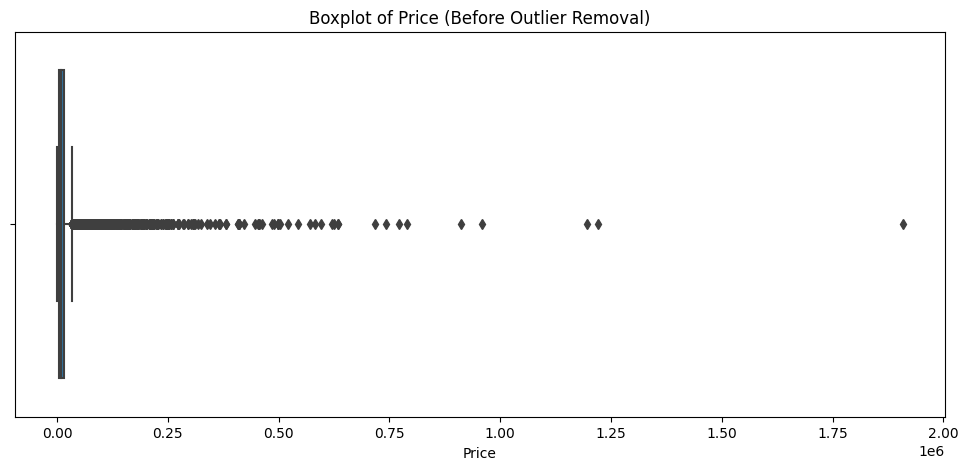

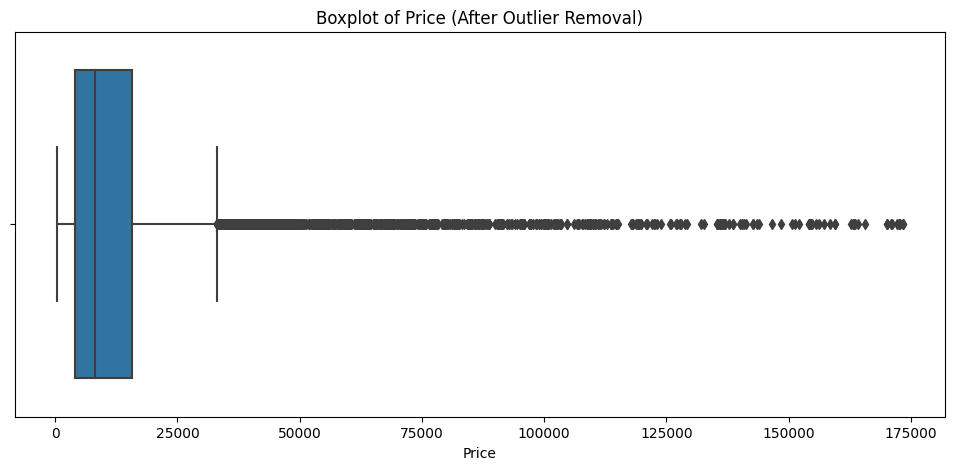

Updated Price Summary:

count     12676.000000
mean      14319.811534
std       19825.056387
min         393.000000
25%        3994.000000
50%        8086.000000
75%       15615.250000
max      173290.000000
Name: price, dtype: float64


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot before removal
plt.figure(figsize=(12, 5))
sns.boxplot(x=df['price'])
plt.title("Boxplot of Price (Before Outlier Removal)")
plt.xlabel("Price")
plt.show()

# Remove top 1% extreme outliers
upper_limit = df['price'].quantile(0.99)
df = df[df['price'] <= upper_limit]

# Boxplot after removal
plt.figure(figsize=(12, 5))
sns.boxplot(x=df['price'])
plt.title("Boxplot of Price (After Outlier Removal)")
plt.xlabel("Price")
plt.show()

# Updated price stats
print("Updated Price Summary:\n")
print(df['price'].describe())


## Step 2.3: Convert Categorical Features ##

In [29]:
from sklearn.preprocessing import OneHotEncoder

# Drop high-cardinality categorical column
df.drop(columns=['host_name'], inplace=True)

# Select categorical features with few unique values
categorical_cols = ['country', 'checkin', 'checkout']

# One-hot encode
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Merge encoded columns
df.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)
df.drop(columns=categorical_cols, inplace=True)
df = pd.concat([df, encoded_df], axis=1)

print(f"✅ Data shape after encoding: {df.shape}")


✅ Data shape after encoding: (12676, 337)


e:\Wasif_Projects\JoinVentureAI_Task\AirBnB_Prediction_Listings\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Step 2.4: Feature Scaling ##

In [30]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns to scale
numerical_cols = ['rating', 'reviews', 'bathrooms', 'beds', 'guests',
                  'toilets', 'bedrooms', 'studios']

# Apply StandardScaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Confirm transformation
print("📏 Scaled Numerical Summary:\n")
print(df[numerical_cols].describe())


📏 Scaled Numerical Summary:

             rating       reviews     bathrooms          beds        guests  \
count  1.267600e+04  1.267600e+04  12676.000000  1.267600e+04  1.267600e+04   
mean   1.578486e-15  3.811684e-17      0.000000 -5.381201e-17 -1.345300e-16   
std    1.000039e+00  1.000039e+00      1.000039  1.000039e+00  1.000039e+00   
min   -1.601241e+01 -5.535921e-01     -0.926295 -8.265062e-01 -1.109183e+00   
25%   -3.256760e-01 -5.383848e-01     -0.416650 -5.723447e-01 -8.410568e-01   
50%    1.886432e-01 -3.863118e-01     -0.416650 -3.181831e-01 -3.048043e-01   
75%    5.315227e-01  8.511459e-02      0.092995  1.901399e-01  2.314482e-01   
max    1.131562e+00  1.378689e+01     24.555974  2.408133e+01  2.912711e+00   

            toilets      bedrooms       studios  
count  1.267600e+04  1.267600e+04  12676.000000  
mean  -1.681625e-17  1.076240e-16      0.000000  
std    1.000039e+00  1.000039e+00      1.000039  
min   -1.403880e-01 -9.278572e-01     -0.155959  
25%   -1.

## Step 3.1: Train-Test Split ##

In [31]:
from sklearn.model_selection import train_test_split

# Separate target and features
X = df.drop(columns=['price'])  # input features
y = df['price']                 # target variable

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check dataset shape
print("Train Features:", X_train.shape)
print("Test Features :", X_test.shape)


Train Features: (10140, 336)
Test Features : (2536, 336)


## Step 3.2: Build the ANN Model ##

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define ANN architecture
model = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)  # Output for regression
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               84736     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 125,953
Trainable params: 125,953
Non-tr

## Step 3.3: Train the Model ##

In [38]:
# Drop non-numeric columns if they exist
non_numeric_cols = ['name', 'address', 'features', 'amenities', 'safety_rules', 'hourse_rules']
X_train = X_train.drop(columns=[col for col in non_numeric_cols if col in X_train.columns])
X_test = X_test.drop(columns=[col for col in non_numeric_cols if col in X_test.columns])

# Convert all to float32
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)


In [39]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,       # use part of training data for validation
    epochs=50,                  # can be tuned
    batch_size=32,              # can be tuned
    verbose=1
)


Epoch 1/50
254/254 [==============================] - 1s 2ms/step - loss: 447522912.0000 - mae: 11503.6445 - val_loss: 317139072.0000 - val_mae: 9247.6758
Epoch 2/50
254/254 [==============================] - 0s 2ms/step - loss: 281874432.0000 - mae: 8995.3887 - val_loss: 293531744.0000 - val_mae: 8759.1982
Epoch 3/50
254/254 [==============================] - 0s 2ms/step - loss: 265399680.0000 - mae: 8687.3193 - val_loss: 285391584.0000 - val_mae: 8508.5371
Epoch 4/50
254/254 [==============================] - 0s 2ms/step - loss: 254352640.0000 - mae: 8601.9805 - val_loss: 276341152.0000 - val_mae: 8472.1826
Epoch 5/50
254/254 [==============================] - 0s 2ms/step - loss: 247505744.0000 - mae: 8468.6553 - val_loss: 273516032.0000 - val_mae: 8263.1904
Epoch 6/50
254/254 [==============================] - 0s 2ms/step - loss: 241978416.0000 - mae: 8347.2549 - val_loss: 268074464.0000 - val_mae: 8301.9756
Epoch 7/50
254/254 [==============================] - 0s 2ms/step - loss: 2

## Step 3.4: Plot Training History ##

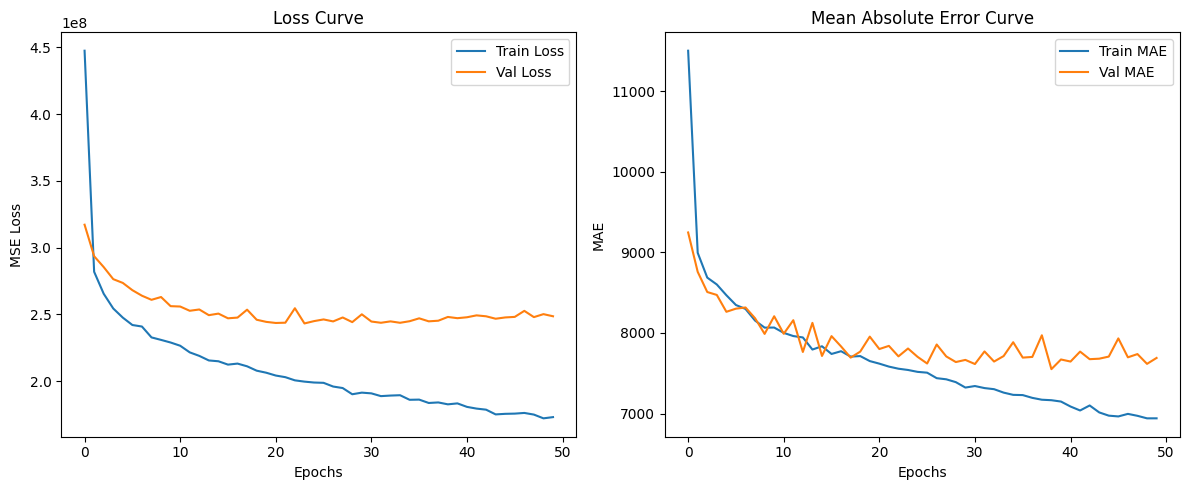

In [40]:
import matplotlib.pyplot as plt

# Plot loss and MAE over epochs
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()

# MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title("Mean Absolute Error Curve")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()

plt.tight_layout()
plt.show()
